In [1]:
### Importing Libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
### Dataset Directories

trainDir = 'datasets/train/'
testDir = 'datasets/test/'
valDir = 'datasets/validation/'

##### Data Preprocessing

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
### Converting Image Data to Tensors

trainDataGen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

testDataGen = ImageDataGenerator(rescale=1./255)

trainGenerator = trainDataGen.flow_from_directory(
    trainDir,
    target_size=(150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

valGenerator = testDataGen.flow_from_directory(
    valDir,
    target_size=(150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model Architecture

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [6]:
model = models.Sequential()

# 4 Convolution layers with maxpooling
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten Layer
model.add(layers.Flatten())

# Dropout Layer
model.add(layers.Dropout(0.5))

# Dense Layer
model.add(layers.Dense(512, activation='relu'))

# Output Dense Layer
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [14]:
history = model.fit(
    trainGenerator,
    steps_per_epoch=50,
    epochs=100,
    validation_data=valGenerator,
    validation_steps=50
).repeat()

Epoch 1/100
50/50 [==============================] - 104s 2s/step - loss: 0.6720 - acc: 0.5852 - val_loss: 0.6476 - val_acc: 0.6430
Epoch 2/100
50/50 [==============================] - 109s 2s/step - loss: 0.6636 - acc: 0.5969 - val_loss: 0.6447 - val_acc: 0.6430
Epoch 3/100
50/50 [==============================] - 77s 2s/step - loss: 0.6505 - acc: 0.6256 - val_loss: 0.6273 - val_acc: 0.6540
Epoch 4/100
50/50 [==============================] - 79s 2s/step - loss: 0.6455 - acc: 0.6181 - val_loss: 0.6734 - val_acc: 0.5750
Epoch 5/100
50/50 [==============================] - 84s 2s/step - loss: 0.6303 - acc: 0.6381 - val_loss: 0.6157 - val_acc: 0.6460
Epoch 6/100
50/50 [==============================] - 79s 2s/step - loss: 0.6351 - acc: 0.6275 - val_loss: 0.6124 - val_acc: 0.6530
Epoch 7/100
50/50 [==============================] - 77s 2s/step - loss: 0.6138 - acc: 0.6622 - val_loss: 0.5868 - val_acc: 0.6930
Epoch 8/100
50/50 [==============================] - 82s 2s/step - loss: 0.6247 -

50/50 [==============================] - 77s 2s/step - loss: 0.5786 - acc: 0.7027 - val_loss: 0.5524 - val_acc: 0.7140
Epoch 19/100
50/50 [==============================] - 75s 1s/step - loss: 0.5753 - acc: 0.6907 - val_loss: 0.5294 - val_acc: 0.7170
Epoch 20/100
50/50 [==============================] - 80s 2s/step - loss: 0.5761 - acc: 0.7090 - val_loss: 0.5953 - val_acc: 0.6750
Epoch 21/100
50/50 [==============================] - 75s 1s/step - loss: 0.5643 - acc: 0.7052 - val_loss: 0.5323 - val_acc: 0.7230
Epoch 22/100
50/50 [==============================] - 75s 1s/step - loss: 0.5633 - acc: 0.7159 - val_loss: 0.5228 - val_acc: 0.7330
Epoch 23/100
50/50 [==============================] - 75s 1s/step - loss: 0.5770 - acc: 0.7039 - val_loss: 0.5250 - val_acc: 0.7410
Epoch 24/100
50/50 [==============================] - 77s 2s/step - loss: 0.5625 - acc: 0.7064 - val_loss: 0.5248 - val_acc: 0.7230
Epoch 25/100
50/50 [==============================] - 79s 2s/step - loss: 0.5622 - acc: 0

Epoch 36/100
50/50 [==============================] - 76s 2s/step - loss: 0.5230 - acc: 0.7449 - val_loss: 0.5191 - val_acc: 0.7320
Epoch 37/100
50/50 [==============================] - 75s 2s/step - loss: 0.5371 - acc: 0.7197 - val_loss: 0.5181 - val_acc: 0.7250
Epoch 38/100
50/50 [==============================] - 75s 2s/step - loss: 0.5283 - acc: 0.7462 - val_loss: 0.5051 - val_acc: 0.7470
Epoch 39/100
50/50 [==============================] - 75s 1s/step - loss: 0.5274 - acc: 0.7449 - val_loss: 0.4850 - val_acc: 0.7520
Epoch 40/100
50/50 [==============================] - 76s 2s/step - loss: 0.5387 - acc: 0.7348 - val_loss: 0.5240 - val_acc: 0.7250
Epoch 41/100
50/50 [==============================] - 76s 2s/step - loss: 0.5083 - acc: 0.7538 - val_loss: 0.4840 - val_acc: 0.7520
Epoch 42/100
50/50 [==============================] - 76s 2s/step - loss: 0.5277 - acc: 0.7418 - val_loss: 0.5832 - val_acc: 0.6950
Epoch 43/100
50/50 [==============================] - 75s 2s/step - loss: 0.

50/50 [==============================] - 78s 2s/step - loss: 0.5045 - acc: 0.7538 - val_loss: 0.6014 - val_acc: 0.6900
Epoch 54/100
50/50 [==============================] - 79s 2s/step - loss: 0.5008 - acc: 0.7645 - val_loss: 0.5266 - val_acc: 0.7270
Epoch 55/100
50/50 [==============================] - 80s 2s/step - loss: 0.4811 - acc: 0.7631 - val_loss: 0.4705 - val_acc: 0.7680
Epoch 56/100
50/50 [==============================] - 79s 2s/step - loss: 0.5048 - acc: 0.7576 - val_loss: 0.4810 - val_acc: 0.7620
Epoch 57/100
50/50 [==============================] - 79s 2s/step - loss: 0.4999 - acc: 0.7481 - val_loss: 0.5042 - val_acc: 0.7530
Epoch 58/100
50/50 [==============================] - 79s 2s/step - loss: 0.5029 - acc: 0.7645 - val_loss: 0.4958 - val_acc: 0.7540
Epoch 59/100
50/50 [==============================] - 80s 2s/step - loss: 0.4864 - acc: 0.7550 - val_loss: 0.5416 - val_acc: 0.7350
Epoch 60/100
50/50 [==============================] - 79s 2s/step - loss: 0.4871 - acc: 0

Epoch 71/100
50/50 [==============================] - 79s 2s/step - loss: 0.4838 - acc: 0.7708 - val_loss: 0.4350 - val_acc: 0.7920
Epoch 72/100
50/50 [==============================] - 91s 2s/step - loss: 0.4694 - acc: 0.7803 - val_loss: 0.4499 - val_acc: 0.7760
Epoch 73/100
50/50 [==============================] - 77s 2s/step - loss: 0.4661 - acc: 0.7727 - val_loss: 0.4322 - val_acc: 0.7970
Epoch 74/100
50/50 [==============================] - 79s 2s/step - loss: 0.4711 - acc: 0.7670 - val_loss: 0.4792 - val_acc: 0.7640
Epoch 75/100
50/50 [==============================] - 76s 2s/step - loss: 0.4610 - acc: 0.7828 - val_loss: 0.4654 - val_acc: 0.7740
Epoch 76/100
50/50 [==============================] - 76s 2s/step - loss: 0.4759 - acc: 0.7828 - val_loss: 0.4977 - val_acc: 0.7570
Epoch 77/100
50/50 [==============================] - 76s 2s/step - loss: 0.4763 - acc: 0.7708 - val_loss: 0.4937 - val_acc: 0.7500
Epoch 78/100
50/50 [==============================] - 76s 2s/step - loss: 0.

50/50 [==============================] - 77s 2s/step - loss: 0.4419 - acc: 0.7923 - val_loss: 0.4474 - val_acc: 0.7800
Epoch 89/100
50/50 [==============================] - 76s 2s/step - loss: 0.4514 - acc: 0.7898 - val_loss: 0.4370 - val_acc: 0.7950
Epoch 90/100
50/50 [==============================] - 76s 2s/step - loss: 0.4529 - acc: 0.7822 - val_loss: 0.5396 - val_acc: 0.7180
Epoch 91/100
50/50 [==============================] - 76s 2s/step - loss: 0.4448 - acc: 0.7962 - val_loss: 0.4382 - val_acc: 0.7970
Epoch 92/100
50/50 [==============================] - 75s 2s/step - loss: 0.4436 - acc: 0.7967 - val_loss: 0.4615 - val_acc: 0.7880
Epoch 93/100
50/50 [==============================] - 76s 2s/step - loss: 0.4446 - acc: 0.7923 - val_loss: 0.4345 - val_acc: 0.8120
Epoch 94/100
50/50 [==============================] - 77s 2s/step - loss: 0.4471 - acc: 0.7973 - val_loss: 0.4688 - val_acc: 0.7870
Epoch 95/100
50/50 [==============================] - 76s 2s/step - loss: 0.4541 - acc: 0

AttributeError: 'History' object has no attribute 'repeat'

In [17]:
model.save("DataAugmentation.h5")

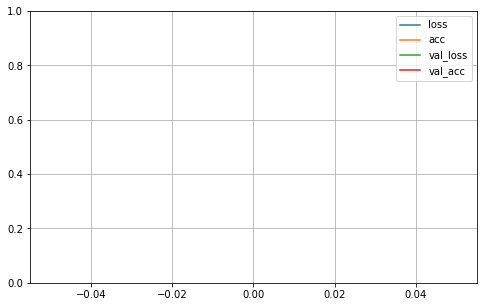

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()